=======================================================================================

# TP de Statistique Descriptive 

=======================================================================================

Dans ce TP, on va manipuler des données réelles et calculer / représenter des indicateurs statistiques de base
Les données que nous allons utiliser recensent les communes de Belgique, et fournissent des renseignements sur la population, le revenu, etc. 
Elles sont très comparables aux données INSEE françaises.

Notez que l'on va beaucoup utiliser les librairies **Pandas**, **matplotlib** et le module **statsmodels**

- Avec  **Numpy**  et  **Matplotlib**  , la librairie  **Pandas**  fait partie des librairies de base pour la data science en Python. Pandas fournit des structures de données puissantes et simples à utiliser, ainsi que les moyens d'opérer rapidement des opérations sur ces structures.
- La librairie **matplotlib** constitue un outil incontournable pour représenter des données, faire des graphiques...
- Le module **statsmodels** fournit des classes et des fonctions pour l'estimation de nombreux modèles statistiques différents, ainsi que pour la réalisation de tests et l'exploration de données statistiques.

## Chargement des données sous forme de Data Frame Pandas

On peut charger la table en allant chercher l'url "http://www.lpsm.paris/pageperso/bousquet/yotta/data/villes-belges.csv"

In [2]:
%matplotlib notebook
from download import download
import pandas as pd
url = "http://www.lpsm.paris/pageperso/bousquet/yotta/data/villes-belges.csv"
path_target = "./villes-belges.csv"
download(url, path_target, replace=False)
df_belgium = pd.read_csv(path_target,index_col='Commune')
df_belgium = df_belgium.drop(['Unnamed: 0'],axis=1)

Replace is False and data exists, so doing nothing. Use replace==True to re-download the data.


La variable Province peut prendre 9 valeurs (1, . . . , 9) qui codent les noms des diﬀérentes provinces de Belgique. Pour simpliﬁer on va faire la conversion en le nom des provinces :

In [3]:
dictionnaire = {1:'Anv.', 2:'Brab.', 3:'Fl.occ.',
                4:'Fl.or.', 5:'Hainaut', 6:'Liège', 
                7:'Limb.',8:'Lux.',9:'Namur'}

df_belgium = df_belgium.replace({'Province':dictionnaire})

In [4]:
# Accès à la colonne "Province"
df_belgium.Province

Commune
Aartselaar        Anv.
Anvers            Anv.
Boechout          Anv.
Boom              Anv.
Borsbeek          Anv.
                 ...  
Doische          Namur
Florennes        Namur
Philippeville    Namur
Walcourt         Namur
Viroinval        Namur
Name: Province, Length: 589, dtype: object

La variable Arrondiss peut prendre 43 valeurs.
Les variables Men04,Women03,...,Tot04 indiquent le nombre d’habitants (hommes, femmes, total) pour les années 2003 et 2004.
Les variables Diffmen, Diffxxx, indiquent les variations du nombre d’habitants entre des deux années (ces variables sont redondantes).
Les dernières variables sont des données ﬁscales :
- *TaxableIncome* désigne le revenu imposable total en euros en 2001 (pour la commune) 
- *Totaltaxation* désigne le revenu ﬁscal global en euros en 2001 
- *averageincome* désigne le produit moyen de l’impôt sur le revenu en euros en 2001 
- *medianincome* désigne le produit médian de l’impôt sur le revenu en euros en 2001.

## Manipulation d'une dataframe

In [5]:
# Quel est le typage du tableau ?
type(df_belgium)

pandas.core.frame.DataFrame

Une matrice DataFrame correspond à une matrice individus-variables où les lignes correspondent à des observations, les colonnes à des attributs décrivant les individus

In [6]:
# Quelles sont les dimensions du tableau ? 
df_belgium.shape

(589, 16)

In [7]:
# Produire un résumé global des données
print(df_belgium.info())

<class 'pandas.core.frame.DataFrame'>
Index: 589 entries, Aartselaar to Viroinval
Data columns (total 16 columns):
INS              589 non-null int64
Province         589 non-null object
Arrondiss        589 non-null int64
Men04            589 non-null int64
Women04          589 non-null int64
Tot04            589 non-null int64
Men03            589 non-null int64
Women03          589 non-null int64
Tot03            589 non-null int64
Diffmen          589 non-null int64
Diffwom          589 non-null int64
DiffTOT          589 non-null int64
TaxableIncome    589 non-null int64
Totaltaxation    589 non-null int64
averageincome    589 non-null int64
medianincome     589 non-null int64
dtypes: int64(15), object(1)
memory usage: 98.2+ KB
None


In [8]:
# On peut aussi produire un descriptif plus fin des données... avec describe
print(df_belgium.describe(include='all'))

                 INS Province   Arrondiss          Men04        Women04  \
count     589.000000      589  589.000000     589.000000     589.000000   
unique           NaN        9         NaN            NaN            NaN   
top              NaN    Brab.         NaN            NaN            NaN   
freq             NaN      111         NaN            NaN            NaN   
mean    47163.312394      NaN   47.122241    8654.853990    9031.261460   
std     24227.624410      NaN   24.222439   13613.389845   14322.630696   
min     11001.000000      NaN   11.000000      45.000000      41.000000   
25%     24107.000000      NaN   24.000000    3331.000000    3383.000000   
50%     45041.000000      NaN   45.000000    5585.000000    5765.000000   
75%     63076.000000      NaN   63.000000    9438.000000    9776.000000   
max     93090.000000      NaN   93.000000  223677.000000  233642.000000   

               Tot04          Men03        Women03          Tot03  \
count      589.00000     589.0

In [9]:
# Pour modifier les options d'affichage des tableaux 
pd.options.display.max_columns = 10
pd.options.display.max_rows = 10
# Afficher le haut du tableau (premières lignes du jeu de données) en utilisant la fonction head()
print(df_belgium.head())
# Afficher le bas du tableau (dernières lignes du jeu de données) en utilisant la fonction tail()
print(df_belgium.tail())

              INS Province  Arrondiss   Men04  Women04  ...  DiffTOT  \
Commune                                                 ...            
Aartselaar  11001     Anv.         11    6971     7169  ...     -113   
Anvers      11002     Anv.         11  223677   233642  ...     3147   
Boechout    11004     Anv.         11    6027     5927  ...        7   
Boom        11005     Anv.         11    7640     8066  ...      219   
Borsbeek    11007     Anv.         11    4948     5328  ...        3   

            TaxableIncome  Totaltaxation  averageincome  medianincome  
Commune                                                                
Aartselaar      242104077       74976114          33809         23901  
Anvers         5416418842     1423715652          22072         17226  
Boechout        167616996       50739035          29453         21613  
Boom            186075961       46636930          21907         17537  
Borsbeek        143225590       40564374          26632        

In [10]:
# Enumeration des colonnes (utiliser la commande ".columns")
df_belgium.columns
# Type de chaque colonne
print(df_belgium.dtypes)

INS               int64
Province         object
Arrondiss         int64
Men04             int64
Women04           int64
                  ...  
DiffTOT           int64
TaxableIncome     int64
Totaltaxation     int64
averageincome     int64
medianincome      int64
Length: 16, dtype: object


In [11]:
# Statistiques descriptives par colonne
df_belgium.describe()

INS   Arrondiss          Men04        Women04         Tot04  \
count    589.000000  589.000000     589.000000     589.000000     589.00000   
mean   47163.312394   47.122241    8654.853990    9031.261460   17686.11545   
std    24227.624410   24.222439   13613.389845   14322.630696   27932.18691   
min    11001.000000   11.000000      45.000000      41.000000      86.00000   
25%    24107.000000   24.000000    3331.000000    3383.000000    6666.00000   
50%    45041.000000   45.000000    5585.000000    5765.000000   11432.00000   
75%    63076.000000   63.000000    9438.000000    9776.000000   19254.00000   
max    93090.000000   93.000000  223677.000000  233642.000000  457319.00000   

       ...      DiffTOT  TaxableIncome  Totaltaxation  averageincome  \
count  ...   589.000000   5.890000e+02   5.890000e+02     589.000000   
mean   ...    75.811545   2.056511e+08   5.521984e+07   25089.565365   
std    ...   206.910001   3.214837e+08   8.638337e+07    3607.272485   
min    ...  -466.000000   1.096964e+06   2.875220e+05   16826.000000   
25%    ...     1.000000   7.653465e+07   1.893090e+07   22684.000000   
50%    ...    43.000000   1.336886e+08   3.586811e+07   24753.000000   
75%    ...   104.000000   2.280053e+08   6.218356e+07   26933.000000   
max    ...  3147.000000   5.416419e+09   1.423716e+09   41602.000000   

       medianincome  
count    589.000000  
mean   19430.840407  
std     2005.345936  
min    13379.000000  
25%    18137.000000  
50%    19636.000000  
75%    20826.000000  
max    25120.000000  

[8 rows x 15 columns]

## Accès aux variables

L'accès à la variable colonne "xx" contenues dans un dataframe Pandas **df** se fait en utilisant la commande 

                            df['xx']

In [11]:
# Accédez simultanément aux colonnes "averageincome" et "Province"
df_belgium[['averageincome','Province']]
# Calculez les moyennes et comptages pour la colonne averageincome avec les fonctions .mean() et .value_counts()
print(df_belgium['averageincome'].mean())
print(df_belgium['averageincome'].value_counts())

25089.565365025468
26211    2
31228    2
24987    2
23262    2
22592    2
        ..
20123    1
29341    1
27294    1
27295    1
24578    1
Name: averageincome, Length: 575, dtype: int64


### Itération sur les variables

On souhaite appliquer à toutes les variables un ensemble de mêmes fonctions (par exemple la moyenne)

Construisons alors une fonction dite "callback" que l'on nomme ici "operation"

In [12]:
import numpy as np
def operation(x):
    return (x.mean())

In [13]:
# Il faut appeler cette fonction sur l'ensemble des colonnes du dataframe 
# axis = 0 => chaque colonne sera transmise à la fonction "operation()"
# la selection select_dtypes() permet d'exclure les variables non numériques s'il y en a
# (on fait ici l'hypothèse qu'une variable à exclure s'appelle "object")

In [14]:
resultat = df_belgium.select_dtypes(exclude=['object']).apply(operation,axis=0)
print(resultat)

INS              4.716331e+04
Arrondiss        4.712224e+01
Men04            8.654854e+03
Women04          9.031261e+03
Tot04            1.768612e+04
                     ...     
DiffTOT          7.581154e+01
TaxableIncome    2.056511e+08
Totaltaxation    5.521984e+07
averageincome    2.508957e+04
medianincome     1.943084e+04
Length: 15, dtype: float64


### Accès indicé aux données d'un DataFrame

On peut accéder aux valeurs du DataFrame via des indices ou plages d'indice. La structure se comporte alors comme une matrice. La cellule en haut et à gauche est de coordonnées (0,0).
Il y a différentes manières de le faire, l'utilisation de .iloc[,] constitue une des solutions les plus simples. N'oublions pas que Shape permet d'obtenir les dimensions (lignes et colonnes) du DataFrame.

In [15]:
# accès à la valeur située en (0,0)
df_belgium.iloc[0,0]

11001

In [16]:
# valeur située en dernière ligne, première colonne 
# utilisation de l'indiçage négatif
df_belgium.iloc[-1,0]

93090

In [17]:
# valeur située en dernière ligne, première colonne 
# shape[0] renvoie le nombre de lignes (première dimension) 
# il faut réduire de -1 parce le premier indice est égal à 0 
# sinon on déborde
df_belgium.iloc[df_belgium.shape[0]-1,0]

93090

In [18]:
# 5 premières valeurs de toutes les colonnes 
# lignes => 0:5 (0 à 5 [non inclus]) 
# colonnes = : (toutes les colonnes)
df_belgium.iloc[0:5,:]

INS Province  Arrondiss   Men04  Women04  ...  DiffTOT  \
Commune                                                 ...            
Aartselaar  11001     Anv.         11    6971     7169  ...     -113   
Anvers      11002     Anv.         11  223677   233642  ...     3147   
Boechout    11004     Anv.         11    6027     5927  ...        7   
Boom        11005     Anv.         11    7640     8066  ...      219   
Borsbeek    11007     Anv.         11    4948     5328  ...        3   

            TaxableIncome  Totaltaxation  averageincome  medianincome  
Commune                                                                
Aartselaar      242104077       74976114          33809         23901  
Anvers         5416418842     1423715652          22072         17226  
Boechout        167616996       50739035          29453         21613  
Boom            186075961       46636930          21907         17537  
Borsbeek        143225590       40564374          26632         20739  

[5 rows x 16 columns]

In [19]:
# avec l'indiçage négatif, on peut facilement accéder aux 5 dernières lignes
df_belgium.iloc[-5:,:]

INS Province  Arrondiss  Men04  Women04  ...  DiffTOT  \
Commune                                                   ...            
Doische        93018    Namur         93   1380     1409  ...       -3   
Florennes      93022    Namur         93   5227     5415  ...      -55   
Philippeville  93056    Namur         93   4047     4141  ...      124   
Walcourt       93088    Namur         93   8460     8919  ...      133   
Viroinval      93090    Namur         93   2690     2956  ...      -23   

               TaxableIncome  Totaltaxation  averageincome  medianincome  
Commune                                                                   
Doische             25633880        5566409          20589         16925  
Florennes          106850530       25825806          22045         18189  
Philippeville       79111701       18225894          21052         17279  
Walcourt           190770807       48999715          23993         19168  
Viroinval           48645440       10561690          19750         16394  

[5 rows x 16 columns]

In [20]:
# 5 premières lignes et deux premières colonnes
df_belgium.iloc[0:5,0:2]

INS Province
Commune                   
Aartselaar  11001     Anv.
Anvers      11002     Anv.
Boechout    11004     Anv.
Boom        11005     Anv.
Borsbeek    11007     Anv.

### Concaténation à un DataFrame

Utiliser la librairie **pandas** et la fonction **concat()**

In [21]:
# Définissez le vecteur "val_new" valant la plus petite valeur entre la médiane 
# et la moyenne du revenu pour chaque commune 

In [22]:
# Voici une version très simple 

income_cols = ['averageincome','medianincome']
val_new = df_belgium[income_cols].apply(min, axis=1)

# Concaténation pour créer une dataframe plus grande
newdf = pd.concat([df_belgium,val_new],axis=1)
# axis = 1 => on concatène ligne à ligne 

print("dimension de newdf ="+str(newdf.shape))


dimension de newdf =(589, 17)


### Isoler des sous-ensembles d'observations répondant à des critères définis sur les champs

On utilise préférentiellement la méthode ".loc[,]"

In [34]:
# Liste des communes appartenant à la province d'Anvers

df_belgium.loc[df_belgium["Province"]=="Anv."]

INS Province  Arrondiss   Men04  Women04  ...  DiffTOT  \
Commune                                                 ...            
Aartselaar  11001     Anv.         11    6971     7169  ...     -113   
Anvers      11002     Anv.         11  223677   233642  ...     3147   
Boechout    11004     Anv.         11    6027     5927  ...        7   
Boom        11005     Anv.         11    7640     8066  ...      219   
Borsbeek    11007     Anv.         11    4948     5328  ...        3   
...           ...      ...        ...     ...      ...  ...      ...   
Turnhout    13040     Anv.         13   19387    20131  ...      101   
Vorselaar   13044     Anv.         13    3644     3674  ...       -9   
Vosselaar   13046     Anv.         13    5108     5049  ...       59   
Westerlo    13049     Anv.         13   11401    11205  ...      210   
Laakdal     13053     Anv.         13    7450     7429  ...      105   

            TaxableIncome  Totaltaxation  averageincome  medianincome  
Commune                                                                
Aartselaar      242104077       74976114          33809         23901  
Anvers         5416418842     1423715652          22072         17226  
Boechout        167616996       50739035          29453         21613  
Boom            186075961       46636930          21907         17537  
Borsbeek        143225590       40564374          26632         20739  
...                   ...            ...            ...           ...  
Turnhout        491395491      128722543          23441         18940  
Vorselaar        86264551       22263671          23673         18655  
Vosselaar       144914743       40795358          29991         21767  
Westerlo        280194521       76243725          25982         21339  
Laakdal         177217617       45361919          24535         20516  

[70 rows x 16 columns]

### Comparaison médiane et moyenne. 

Pour chaque municipalité, la variable "medianincome" décrit la médiane du produit de l’impôt sur le revenu. 
Il s’agit d’une médiane calculée sur la population des contribuables de la municipalité. 

Cette médiane coïncide-t-elle avec la moyenne (variable "averageincome") ?

Utiliser **matplotlib.pyplot** pour faire une comparaison graphique 

<IPython.core.display.Javascript object>


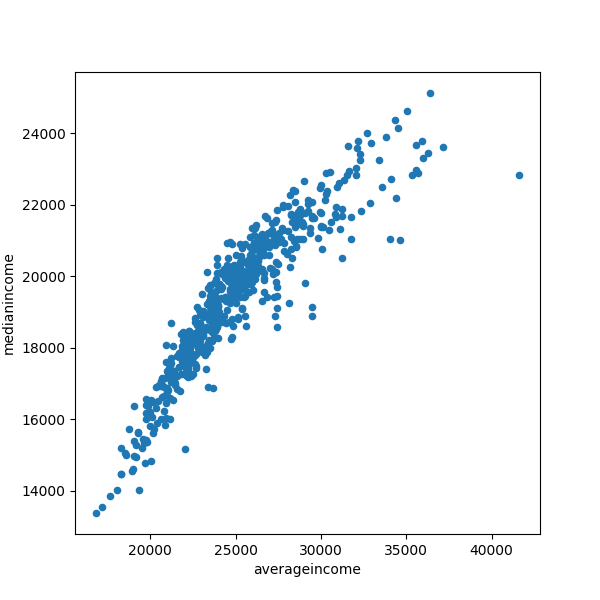

<IPython.core.display.Javascript object>


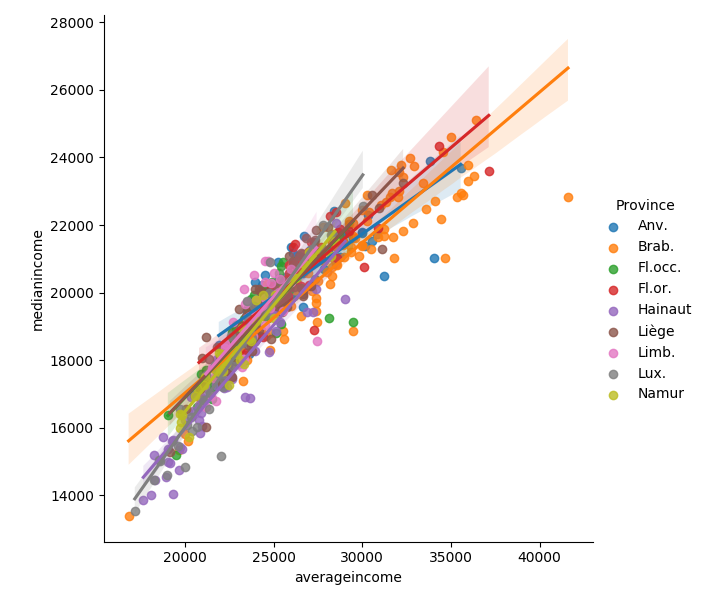

In [37]:
# Test de la solution  
import seaborn as sns
# Dataframe.plot
df_belgium.plot(x='averageincome',y='medianincome',kind='scatter',figsize=(6,6))
# Seaborn
sns.lmplot(x='averageincome',y='medianincome',data=df_belgium,hue='Province',size=6)

<IPython.core.display.Javascript object>


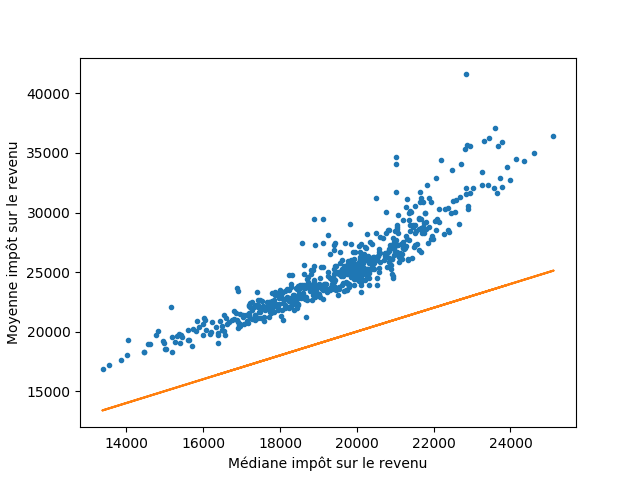

In [39]:
# Une autre solution possible (basique)
import matplotlib.pyplot as plt
plt.figure()
plt.plot(df_belgium['medianincome'],
df_belgium['averageincome'],'.')
plt.plot(df_belgium['medianincome'],df_belgium['medianincome']) # on trace la ligne d'équation y = x
plt.xlabel('Médiane impôt sur le revenu')
plt.ylabel('Moyenne impôt sur le revenu')
plt.show()


### Affichage de modalités

Le package "seaborn" permet d'afficher les modalités (ici, les provinces sur lesquelles sont calculées les médianes et les moyennes), 
en utilisant la fonction **sns.lmplot()** avec l'option **hue='Province'** :

https://seaborn.pydata.org/generated/seaborn.lmplot.html

<IPython.core.display.Javascript object>


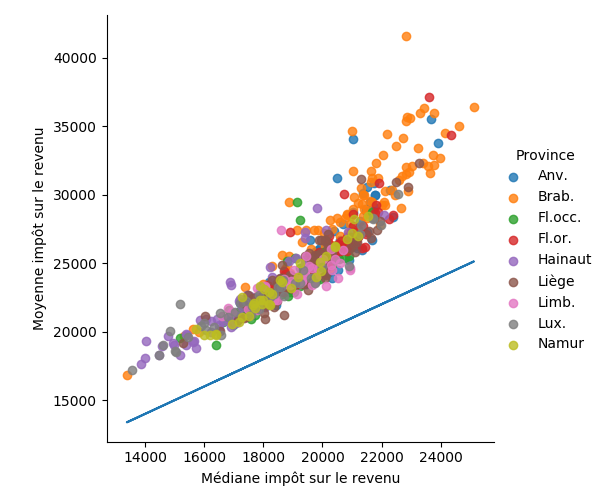

Text(47.42393055555554, 0.5, 'Moyenne impôt sur le revenu')

In [40]:
# A vous de jouer ! Reproduisez le plot précédent avec des couleurs différenciant les provinces
import seaborn as sns
fig3 = sns.lmplot(x='medianincome',y='averageincome',data=df_belgium,fit_reg=False, hue='Province')
plt.plot(df_belgium['medianincome'],
df_belgium['medianincome'])
plt.xlabel('Médiane impôt sur le revenu')
plt.ylabel('Moyenne impôt sur le revenu')

En 2001, dans les municipalités belges, la moyenne du produit de l’impôt sur le revenu était supérieure à la médiane (la ligne est la droite d’équation y = x). Le point le plus éloigné de la droite y = x correspond à une exception de la province 2, le Brabant (il semblerait que la table ne distingue pas le Brabant wallon et le Brabant ﬂamand cependant).

## Production de statistiques d'ordre

Produire l’échantillon formé par les 5 premières valeurs de la variable "averageincome" (les communes Aartselaar Anvers Boechout Boom Borsbeek ).

In [41]:
df_belgium['averageincome'][0:5]

Commune
Aartselaar    33809
Anvers        22072
Boechout      29453
Boom          21907
Borsbeek      26632
Name: averageincome, dtype: int64

Trier les valeurs constituant l’échantillon en ordre croissant. 
Cela forme ce que l’on appelle les statistiques d’ordre. 

Il est utile d'utiliser la fonction **np.sort()** de **NumPy** pour cela

In [42]:
import numpy as np
np.sort(df_belgium['averageincome'][0:5])

array([21907, 22072, 26632, 29453, 33809])

In [43]:
# le tri peut être généralisé aux DataFrame
# par exemple : trier le tableau de données selon le revenu médian, avec l'option "by=..." 
# puis affichage des noms des communes avec leur revenu médian

tri = df_belgium.sort_values(by='averageincome')

# On vérifie le résultat
tri['averageincome']


Commune
Saint-Josse-ten-Noode    16826
Rendeux                  17172
Colfontaine              17654
Froidchapelle            18073
Durbuy                   18270
                         ...  
Chaumont-Gistoux         35968
Kraainem                 36299
Oud-Heverlee             36418
Sint-Martens-Latem       37134
Lasne                    41602
Name: averageincome, Length: 589, dtype: int64

C'est bien trié dans l'ordre

In [44]:
# On constate que l'on peut indexer avec un vecteur de 
# booléens si on s'intéresse à une variable qualitative ou catégorielle (comme la Province par exemple). 

#En effet,
df_belgium['Province']=='Anv.'

Commune
Aartselaar        True
Anvers            True
Boechout          True
Boom              True
Borsbeek          True
                 ...  
Doische          False
Florennes        False
Philippeville    False
Walcourt         False
Viroinval        False
Name: Province, Length: 589, dtype: bool

L'utilisation de **groupby()** permet d'accéder aux sous-DataFrame associés à chaque item de la variable de regroupement. Il est dès lors possible d'appliquer explicitement d'autres traitements sur ces sous-ensembles de données.

In [49]:
# Procéder à une scission des données selon la Province
g = df_belgium.groupby("Province")

# Représenter le sous-DataFrame associé à la province d'Anvers
g.get_group("Anv.") 

# Calculer la dimension du sous-DataFrame associé à la province d'Anvers
#g.get_group("Anv.").shape

INS Province  Arrondiss   Men04  Women04  ...  DiffTOT  \
Commune                                                 ...            
Aartselaar  11001     Anv.         11    6971     7169  ...     -113   
Anvers      11002     Anv.         11  223677   233642  ...     3147   
Boechout    11004     Anv.         11    6027     5927  ...        7   
Boom        11005     Anv.         11    7640     8066  ...      219   
Borsbeek    11007     Anv.         11    4948     5328  ...        3   
...           ...      ...        ...     ...      ...  ...      ...   
Turnhout    13040     Anv.         13   19387    20131  ...      101   
Vorselaar   13044     Anv.         13    3644     3674  ...       -9   
Vosselaar   13046     Anv.         13    5108     5049  ...       59   
Westerlo    13049     Anv.         13   11401    11205  ...      210   
Laakdal     13053     Anv.         13    7450     7429  ...      105   

            TaxableIncome  Totaltaxation  averageincome  medianincome  
Commune                                                                
Aartselaar      242104077       74976114          33809         23901  
Anvers         5416418842     1423715652          22072         17226  
Boechout        167616996       50739035          29453         21613  
Boom            186075961       46636930          21907         17537  
Borsbeek        143225590       40564374          26632         20739  
...                   ...            ...            ...           ...  
Turnhout        491395491      128722543          23441         18940  
Vorselaar        86264551       22263671          23673         18655  
Vosselaar       144914743       40795358          29991         21767  
Westerlo        280194521       76243725          25982         21339  
Laakdal         177217617       45361919          24535         20516  

[70 rows x 16 columns]

In [48]:
# Solution potentielle 
df_belgium.groupby("Province").median().loc["Anv."]

INS                  12017.5
Arrondiss               12.0
Men04                 7746.0
Women04               7846.5
Tot04                15586.0
                    ...     
DiffTOT                 76.0
TaxableIncome    199923047.0
Totaltaxation     51343945.0
averageincome        25980.0
medianincome         20422.5
Name: Anv., Length: 15, dtype: float64

Calculer différentes fonctions à des variables via la fonction **.agg()**, telle la moyenne et l'écart-type

In [51]:
g[['medianincome','averageincome']].agg([pd.Series.mean,pd.Series.std])

medianincome              averageincome             
                  mean          std          mean          std
Province                                                      
Anv.      20462.714286  1223.725556  26566.457143  2795.130495
Brab.     20906.981982  2064.549905  28714.711712  4160.832669
Fl.occ.   18990.484375  1341.680373  23812.093750  2089.098991
Fl.or.    20348.815385  1274.936982  26192.369231  2523.968215
Hainaut   17294.362319  1700.245631  22155.869565  2591.021278
Limb.     19211.454545  1083.428332  23880.840909  1306.762215
Liège     19334.083333  1473.704268  24407.761905  2464.461028
Lux.      17901.022727  2255.447952  22543.545455  2905.915414
Namur     18508.236842  1578.128834  23226.605263  2431.973690

In [52]:
# Ou plus simple (et plus générique) :
g.agg(['mean' , 'std']) 

INS               Arrondiss                   Men04  ...  \
                  mean          std       mean       std          mean  ...   
Province                                                                ...   
Anv.      11982.128571   905.027791  11.957143  0.907868  11797.014286  ...   
Brab.     23470.126126  1351.989538  23.414414  1.331223  10491.270270  ...   
Fl.occ.   34361.546875  2216.106252  34.343750  2.219815   8745.546875  ...   
Fl.or.    43555.953846  1585.632764  43.523077  1.582203  10417.953846  ...   
Hainaut   54055.608696  2091.372201  54.014493  2.082792   8978.057971  ...   
Limb.     71923.840909   846.379209  71.886364  0.841259   9164.295455  ...   
Liège     62528.559524   998.999974  62.476190  0.999713   5963.571429  ...   
Lux.      83347.909091  1332.931527  83.318182  1.325470   2862.454545  ...   
Namur     91862.868421   734.389365  91.789474  0.740996   5813.210526  ...   

         Totaltaxation averageincome               medianincome               
                   std          mean          std          mean          std  
Province                                                                      
Anv.      1.676365e+08  26566.457143  2795.130495  20462.714286  1223.725556  
Brab.     6.864877e+07  28714.711712  4160.832669  20906.981982  2064.549905  
Fl.occ.   6.380159e+07  23812.093750  2089.098991  18990.484375  1341.680373  
Fl.or.    1.023333e+08  26192.369231  2523.968215  20348.815385  1274.936982  
Hainaut   6.223808e+07  22155.869565  2591.021278  17294.362319  1700.245631  
Limb.     4.563909e+07  23880.840909  1306.762215  19211.454545  1083.428332  
Liège     5.611483e+07  24407.761905  2464.461028  19334.083333  1473.704268  
Lux.      9.530323e+06  22543.545455  2905.915414  17901.022727  2255.447952  
Namur     5.441429e+07  23226.605263  2431.973690  18508.236842  1578.128834  

[9 rows x 30 columns]

In [53]:
# Solution plus compacte 
df_belgium[["averageincome","medianincome"]].agg(["mean","std"])

averageincome  medianincome
mean   25089.565365  19430.840407
std     3607.272485   2005.345936

## Tracé d'histogramme et de densité

Passer par matplotlib permet de réaliser des graphiques performants (http://matplotlib.org/). Mais il faut connaître les procédures de la librairie, ce qui nécessite un apprentissage supplémentaire qui n'est pas toujours évident.
Heureusement, Pandas propose des commandes simples qui encapsulent l'appel à ces procédures et nous simplifie grandement la vie. Il faut importer matplotlib pour que l'ensemble fonctionne correctement.

In [54]:
# indiquer que l'on veut voir apparaître les graphiques dans le notebook 
# /!\ très important, sinon on ne verrait rien
%matplotlib inline

# importation de la librairie
import matplotlib.pyplot as plt

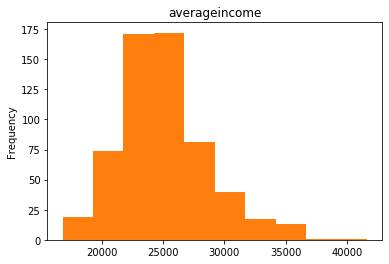

In [56]:
# Afficher l'histogramme de la distribution des revenus moyens par commune
df_belgium.hist(column='averageincome')
# ou encore
df_belgium.averageincome.plot.hist()

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1a1f2061d0>]],
      dtype=object)

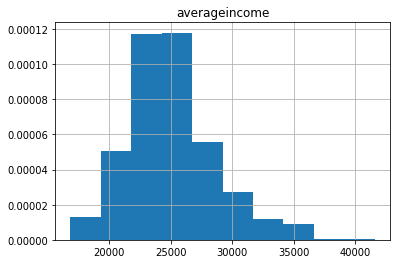

In [57]:
# Comment représenter l'histogramme des fréquences ?
# Il faut utiliser l'option "density=True"
df_belgium.hist(column='averageincome',density=True)

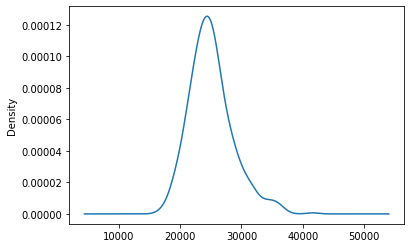

In [58]:
# Représenter également l'estimateur à noyaux de la densité avec la fonction 
# "plot.kde()" qui utilise des noyaux (kernels) gaussiens

df_belgium['averageincome'].plot.kde()

 Remarque : de meilleurs estimateurs à noyaux sont disponibles dans la librairie scikit-learn :
            
https://scikit-learn.org/stable/modules/density.html

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1a1f1ed790>,
      dtype=object)

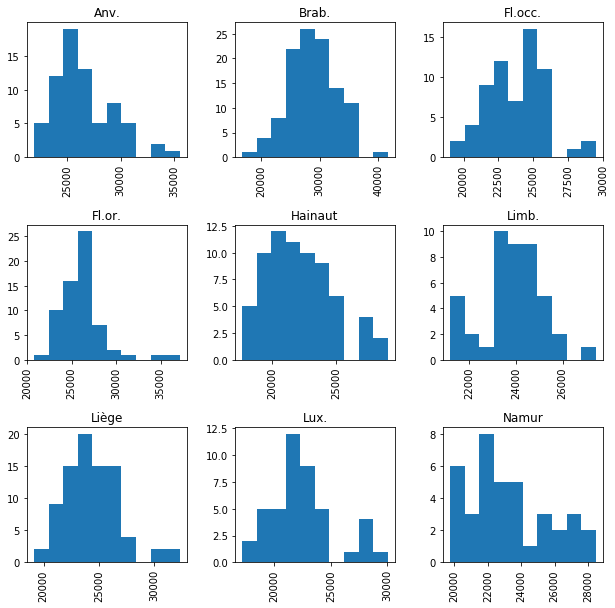

In [59]:
# Afficher l'histogramme de la distribution des revenus moyens par commune selon les provinces
df_belgium.hist(column='averageincome',by="Province",figsize=(10, 10))

On peut trouver des explications de commande utiles pour varier le **tracé des histogrammes** ici :
    
http://www.python-simple.com/python-matplotlib/histogram.php

## Tracé de la fonction de répartition empirique 

- En utilisant le package **statsmodels.distributions**, sélectionner la classe de fonctions empiriques **empirical_distribution**
puis importer la fonction ECDF (pour Empirical Cumulative Distribution Function = fonction de répartition empirique)
- Représentez côte à côte les deux fonctions de répartition empirique du revenu médian pour l'ensemble de la Belgique et pour la province d'Anvers seulement, représentée par les 5 premières valeurs de la variables "averageincome"   (utilisez la fonction *subplot()*)

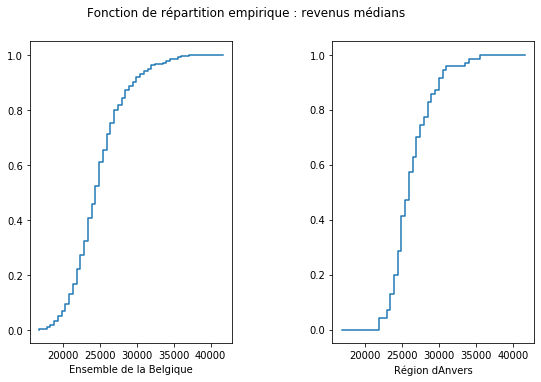

In [60]:
from statsmodels.distributions.empirical_distribution import ECDF

sample = df_belgium['averageincome']# toute la Belgique

prov_Anvers = df_belgium.loc[df_belgium['Province']=='Anv.',:]
sample2 = prov_Anvers['averageincome'] # province d'Anvers seulement

ecdf = ECDF(sample)
x = np.linspace(min(sample), max(sample)) # trace une grille régulière de valeurs entre 2 bornes
y = ecdf(x)

ecdf2 = ECDF(sample2)
y2 = ecdf2(x)

figure = plt.figure(figsize = (10, 6))
plt.gcf().subplots_adjust(left = 0.2, bottom = 0.2, right = 0.9, top = 0.9, wspace = 0.5, hspace = 0)
plt.subplot(1, 2, 1)
plt.step(x, y)
plt.xlabel('Ensemble de la Belgique')
plt.subplot(1, 2, 2)
plt.step(x, y2)
plt.xlabel('Région d''Anvers')
plt.suptitle('Fonction de répartition empirique : revenus médians')
plt.show()

In [ ]:
# Plottez maintenant sur le même graphe les deux fonctions de répartition empiriques précédentes, 
# afin de les différencier, 
# ainsi que la fonction de répartition empirique des revenus médians spécifique pour 
# les 5 premières communes considérées plus haut
# (les communes Aartselaar Anvers Boechout Boom Borsbeek)

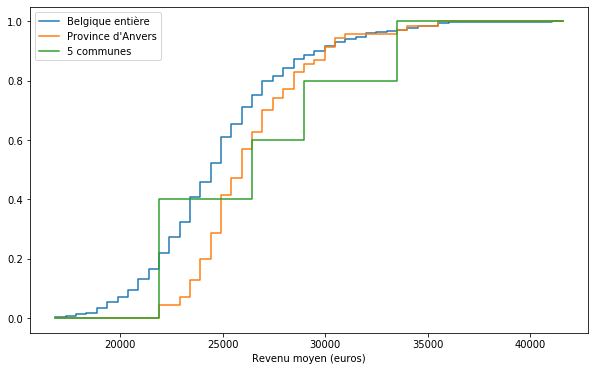

In [61]:
sample3 = df_belgium['averageincome'][0:5]
ecdf3 = ECDF(sample3)
y3 = ecdf3(x)

figure = plt.figure(figsize = (10, 6))
plt.step(x, y,label="Belgique entière")
plt.step(x, y2,label="Province d'Anvers")
plt.step(x, y3,label='5 communes')
plt.xlabel('Revenu moyen (euros)')
plt.legend()
plt.show()

Noter qu'on peut aussi utiliser des fonctions dans la librairie **PyLab** pour représenter des courbes superposées

Voir par exemple : https://courspython.com/introduction-courbes.html

## QQ-plot

On s'intéresse au comportement des distributions des revenus moyens par province, et on les suppose gaussiens.

A l'aide la fonction **probplot()** dans la librairie **scipy.stats**, représentez des qq-plots vous permettant de juger de ce caractère gaussien 

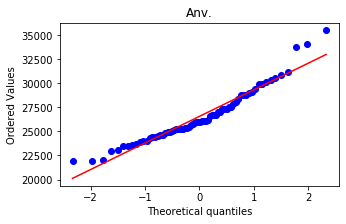

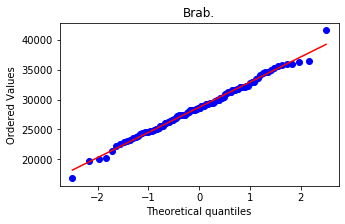

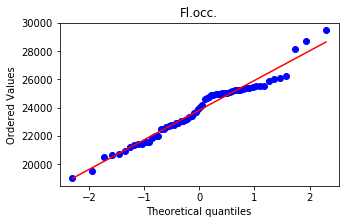

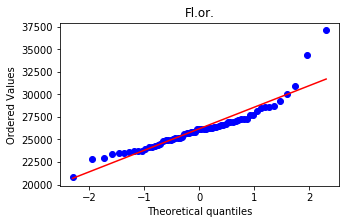

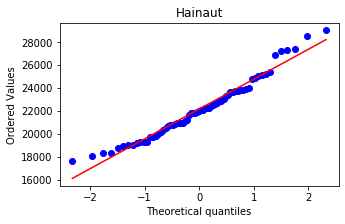

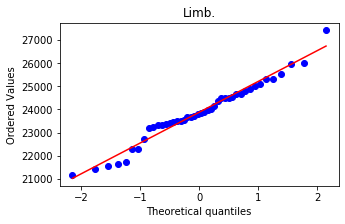

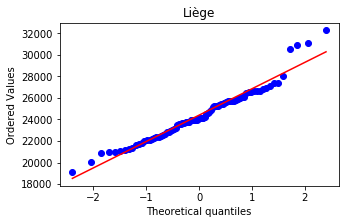

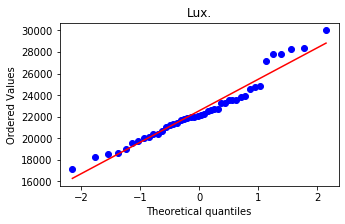

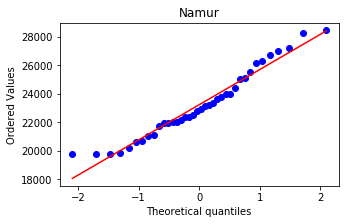

In [62]:
import scipy.stats as stats
import pylab

# Lister les provinces
prov = np.unique(df_belgium.Province)

# On fait une boucle sur la liste des provinces
for p in prov:
    data = df_belgium[df_belgium['Province']==p]
    x = data['averageincome']
    figure = plt.figure(figsize = (5, 3))
    stats.probplot(x,dist="norm",plot=pylab)
    pylab.title(str(p))
    pylab.show()


### Calcul de quantile empirique

In [63]:
# Avec la fonction np.percentile, calculer les quartiles de la distribution 
# du revenu moyen sur l'ensemble de la Belgique

np.percentile(df_belgium['averageincome'], [1/4, 1/2,3/4])

array([17398.54, 18047.86, 18274.1 ])

### Calcul de variance et dispersion

In [ ]:
# A l'aide de np.var et np.std, calculez les variances et écart-types 
# de la distribution des revenus médians sur l'ensemble de la Belgique

variance = np.var(df_belgium['medianincome'])
ecart_type = np.std(df_belgium['medianincome'])

# Calcul de l'écart inter-quartiles
quantiles = np.percentile(df_belgium['averageincome'],[25,75])
IQR = quantiles[1]- quantiles[0]


### Boîtes à moustaches (boxplots) et violin plots

{'whiskers': [<matplotlib.lines.Line2D at 0x1a1ef71290>,
 'caps': [<matplotlib.lines.Line2D at 0x1a1ef71d50>,
 'boxes': [<matplotlib.lines.Line2D at 0x1a1ef83650>],
 'medians': [<matplotlib.lines.Line2D at 0x1a1ef677d0>],
 'fliers': [<matplotlib.lines.Line2D at 0x1a1ef67cd0>],
 'means': []}

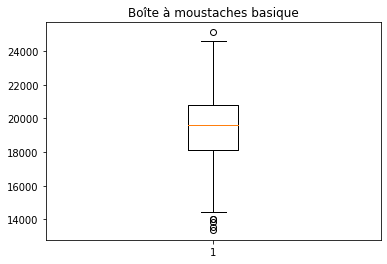

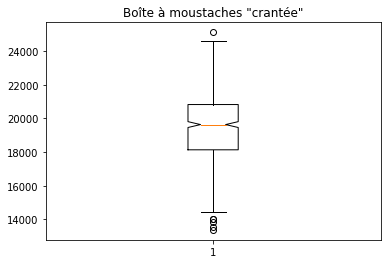

In [64]:
# Tracer des boxplots pour la distribution des revenus médian
# à l'échelle de la Belgique

fig1, ax1 = plt.subplots()
ax1.set_title('Boîte à moustaches basique')
ax1.boxplot(df_belgium['medianincome'])
fig2, ax2 = plt.subplots()
ax2.set_title('Boîte à moustaches "crantée"')
ax2.boxplot(df_belgium['medianincome'], notch=True)

Comment représenter l'étalement des revenus par province ? 

Utilisons le même principe du "group by" avec la fonction **.boxplot()**

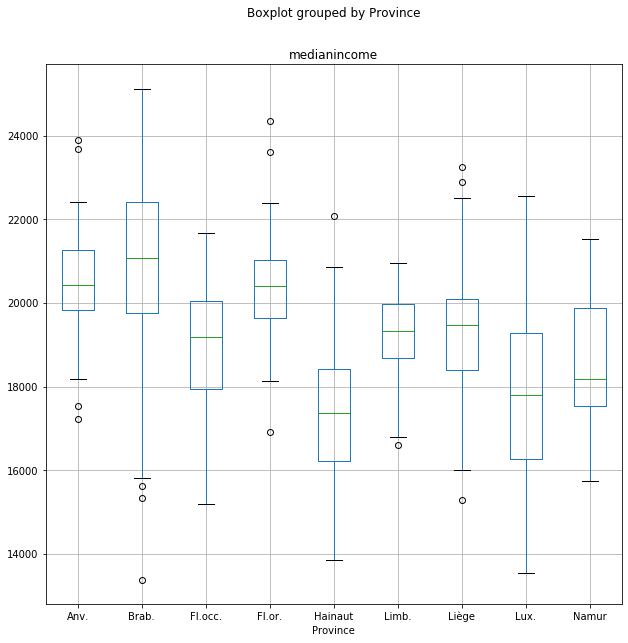

In [65]:
# 1ere idée
df_belgium.boxplot(column='medianincome',by="Province",figsize=(10, 10))

/Users/nicolasbousquet/opt/miniconda3/lib/python3.7/site-packages/seaborn/categorical.py:3695: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


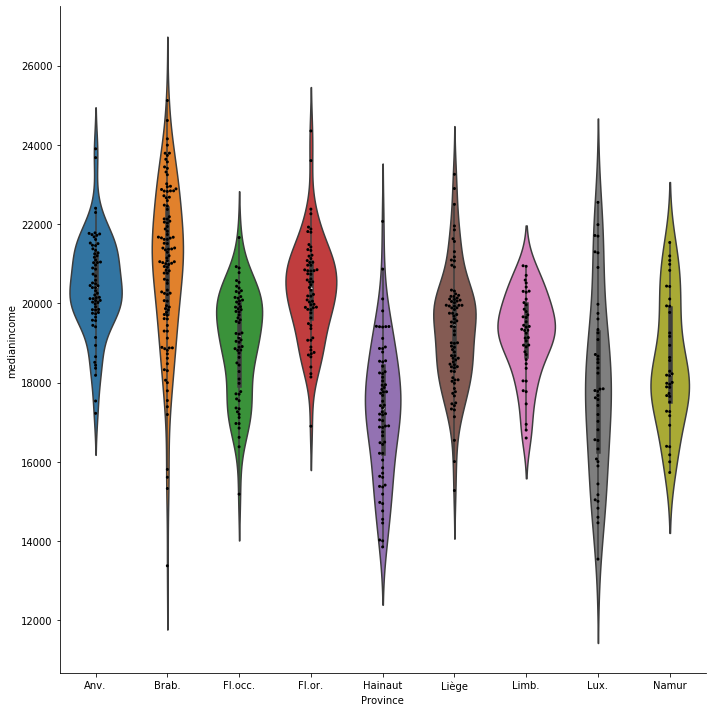

In [66]:
# Solution proposée 
g = sns.catplot(x='Province',y='medianincome',kind='violin',data=df_belgium,size=10)
sns.swarmplot(x='Province',y='medianincome',color='k',size=3,data=df_belgium,ax=g.ax)

Faisons de même avec les *violin plots*

On peut utiliser la fonction **violinplot()** dans la librairie **seaborn**

Plus d'information ici : https://seaborn.pydata.org/generated/seaborn.violinplot.html

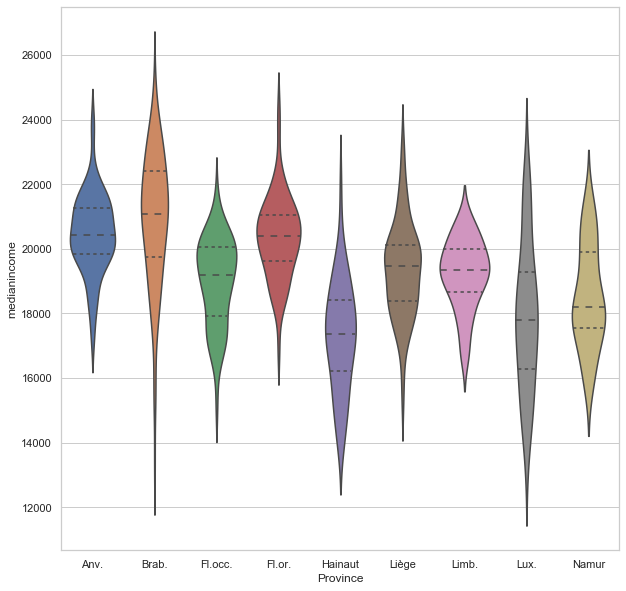

In [67]:
import seaborn as sns
figure = plt.figure(figsize = (10, 10))
sns.set(style="whitegrid")
ax = sns.violinplot(x="Province",y='medianincome',data=df_belgium,inner="quartile")

## Pour finir ce TP...

... vous pouvez trouver encore plein de manipulations de statistique descriptive possibles dans le TP suivant :
    
http://eric.univ-lyon2.fr/~ricco/tanagra/fichiers/fr_Tanagra_Data_Manipulation_Pandas.pdf

In [1]:
import numpy as np
np.linspace(0,1)

array([0.        , 0.02040816, 0.04081633, 0.06122449, 0.08163265,
       0.10204082, 0.12244898, 0.14285714, 0.16326531, 0.18367347,
       0.20408163, 0.2244898 , 0.24489796, 0.26530612, 0.28571429,
       0.30612245, 0.32653061, 0.34693878, 0.36734694, 0.3877551 ,
       0.40816327, 0.42857143, 0.44897959, 0.46938776, 0.48979592,
       0.51020408, 0.53061224, 0.55102041, 0.57142857, 0.59183673,
       0.6122449 , 0.63265306, 0.65306122, 0.67346939, 0.69387755,
       0.71428571, 0.73469388, 0.75510204, 0.7755102 , 0.79591837,
       0.81632653, 0.83673469, 0.85714286, 0.87755102, 0.89795918,
       0.91836735, 0.93877551, 0.95918367, 0.97959184, 1.        ])